In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Cargamos los datos
df_encoded = pd.read_csv('df_tabla_minable.csv')

In [2]:
# Definimos variables independientes y dependiente, eliminamos las columnas que no aportan al modelo
X = df_encoded.drop(columns=['RENDIMIENTO BAJO_SI','RENDIMIENTO BAJO_NO','Estudiante'])  # Características
y = df_encoded['RENDIMIENTO BAJO_SI']  # Variable objetivo

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30, stratify=y)

# Creamos el modelo XGBoost
model = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False, 
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Entrenamos el modelo
model.fit(X_train, y_train)

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [20:43:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [3]:
# Realizamos predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluamos el modelo en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

# Evaluamos el modelo en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

# Mostramos resultados
print("=== Conjunto de Entrenamiento ===")
print(f"Exactitud: {train_accuracy}")
print(train_report)

print("\n=== Conjunto de Prueba ===")
print(f"Exactitud: {test_accuracy}")
print(test_report)

# Evaluamos el modelo matris de confucion
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))  # Para entrenamiento
print(confusion_matrix(y_test, y_test_pred))   # Para prueba

=== Conjunto de Entrenamiento ===
Exactitud: 0.8179775280898877
              precision    recall  f1-score   support

       False       0.82      0.98      0.90       355
        True       0.71      0.17      0.27        90

    accuracy                           0.82       445
   macro avg       0.77      0.57      0.58       445
weighted avg       0.80      0.82      0.77       445


=== Conjunto de Prueba ===
Exactitud: 0.7760416666666666
              precision    recall  f1-score   support

       False       0.80      0.97      0.87       153
        True       0.17      0.03      0.04        39

    accuracy                           0.78       192
   macro avg       0.48      0.50      0.46       192
weighted avg       0.67      0.78      0.70       192

[[349   6]
 [ 75  15]]
[[148   5]
 [ 38   1]]


In [4]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Definimos el modelo para la revision de hiperparametros
xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, random_state=42)

# Definimos el espacio de búsqueda
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.5],
}

# Configuramos la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=5, verbose=1, n_jobs=-1)

# Ejecutamos la búsqueda
grid_search.fit(X_train, y_train)

# Mostramos la mejor combinación de hiperparámetros
print("Mejores parámetros encontrados: ", grid_search.best_params_)
print("Mejor puntaje F1: ", grid_search.best_score_)


Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Mejores parámetros encontrados:  {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.9}
Mejor puntaje F1:  0.22407031778228537


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [20:44:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [5]:
best_params = grid_search.best_params_  # O random_search.best_params_
model = xgb.XGBClassifier(**best_params, use_label_encoder=False, random_state=42)
model.fit(X_train, y_train)


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [20:44:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [6]:
# Realizar predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluar el modelo en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

# Evaluar el modelo en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

# Imprimir resultados
print("=== Conjunto de Entrenamiento ===")
print(f"Exactitud: {train_accuracy}")
print(train_report)

print("\n=== Conjunto de Prueba ===")
print(f"Exactitud: {test_accuracy}")
print(test_report)

# Evaluamos el modelo matris de confucion
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))  # Para entrenamiento
print(confusion_matrix(y_test, y_test_pred))   # Para prueba

=== Conjunto de Entrenamiento ===
Exactitud: 0.8898876404494382
              precision    recall  f1-score   support

       False       0.90      0.97      0.93       355
        True       0.84      0.57      0.68        90

    accuracy                           0.89       445
   macro avg       0.87      0.77      0.80       445
weighted avg       0.89      0.89      0.88       445


=== Conjunto de Prueba ===
Exactitud: 0.7291666666666666
              precision    recall  f1-score   support

       False       0.80      0.88      0.84       153
        True       0.24      0.15      0.19        39

    accuracy                           0.73       192
   macro avg       0.52      0.51      0.51       192
weighted avg       0.69      0.73      0.71       192

[[345  10]
 [ 39  51]]
[[134  19]
 [ 33   6]]


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [20:45:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


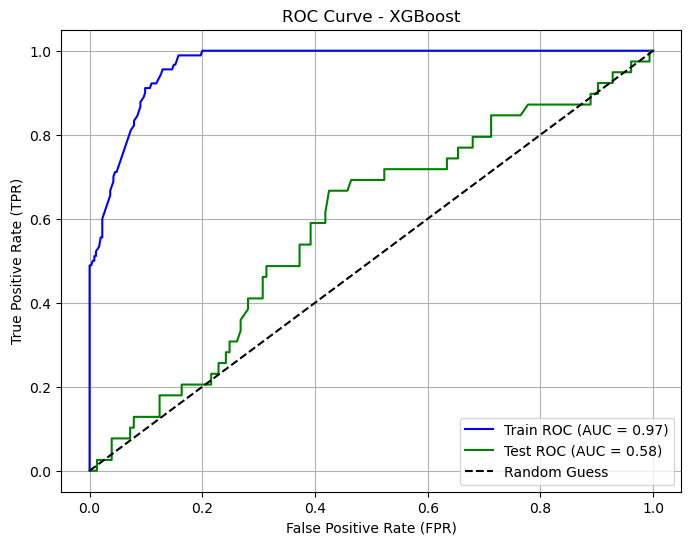

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import xgboost as xgb

# Supongamos que ya tienes tus datos: X_train, X_test, y_train, y_test

# Crear y entrenar el modelo XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Obtener las probabilidades para la clase positiva
y_train_prob = xgb_model.predict_proba(X_train)[:, 1]
y_test_prob = xgb_model.predict_proba(X_test)[:, 1]

# Calcular las tasas FPR, TPR y el AUC para el conjunto de entrenamiento y prueba
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {auc_train:.2f})', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {auc_test:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Línea de referencia
plt.title('ROC Curve - XGBoost')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.grid()
plt.show()
